In [18]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Dense, Convolution2D, Dropout, Flatten, MaxPooling2D, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [37]:
ds = pd.read_csv('./train.csv')
data = ds.values[:5000]

In [38]:
print data.shape
X = data[:, 1:]/255.0
X = X.reshape((X.shape[0], 28, 28, 1))
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(5000, 785)
(5000, 28, 28, 1) (5000, 10)


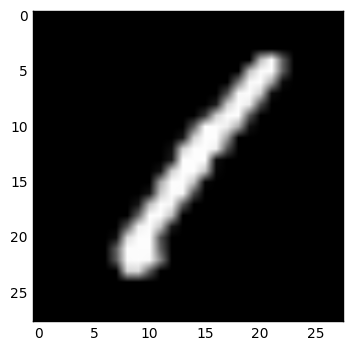

In [39]:
plt.imshow(X[0].reshape((28, 28)), cmap='gray')
plt.show()

In [41]:
split = int(0.3 * X.shape[0])

X_train = X[:split]
X_val = X[split:]

y_train = y[:split]
y_val = y[split:]

print X_train.shape, X_val.shape
print y_train.shape, y_val.shape

(1500, 28, 28, 1) (3500, 28, 28, 1)
(1500, 10) (3500, 10)


In [57]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_42 (Convolution2D) (None, 26, 26, 32)    320         convolution2d_input_21[0][0]     
____________________________________________________________________________________________________
convolution2d_43 (Convolution2D) (None, 24, 24, 16)    4624        convolution2d_42[0][0]           
____________________________________________________________________________________________________
maxpooling2d_19 (MaxPooling2D)   (None, 12, 12, 16)    0           convolution2d_43[0][0]           
____________________________________________________________________________________________________
flatten_17 (Flatten)             (None, 2304)          0           maxpooling2d_19[0][0]            
___________________________________________________________________________________________

In [58]:
hist = model.fit(X_train, y_train,
                nb_epoch=20,
                shuffle=True,
                batch_size=100,
                validation_data=(X_val, y_val))

Train on 1500 samples, validate on 3500 samples
Epoch 1/20
1500/1500 [==============================] - 1s - loss: 1.5593 - acc: 0.5113 - val_loss: 0.5851 - val_acc: 0.8157
Epoch 2/20
1500/1500 [==============================] - 0s - loss: 0.6386 - acc: 0.7833 - val_loss: 0.4045 - val_acc: 0.8766

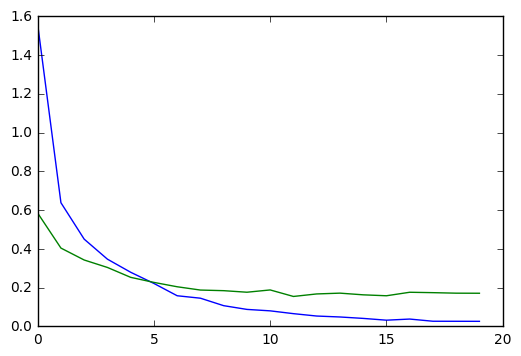

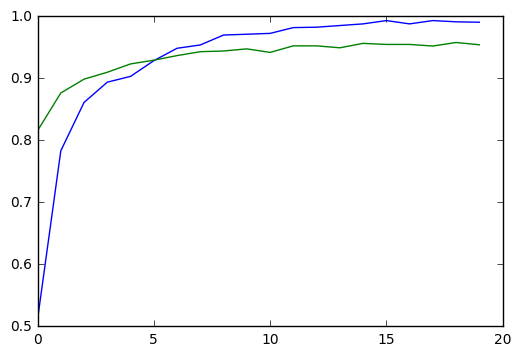

In [60]:
th = hist.history

plt.figure(0)
plt.plot(th['loss'], 'b')
plt.plot(th['val_loss'], 'g')

plt.figure(1)
plt.plot(th['acc'], 'b')
plt.plot(th['val_acc'], 'g')